<a href="https://colab.research.google.com/github/Rajan-sust/ACM-ICPC/blob/master/Classification/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

### *Dataset*

In [0]:
url = 'https://raw.githubusercontent.com/Rajan-sust/Ass/master/Dataset/comments_with_label.csv'
dataset = pd.read_csv(url)

In [3]:
dataset.shape

(5011, 2)

In [4]:
dataset.head()

,comment,label
0,সমস্যাটির জন্য আমরা আন্তরিকভাবে দুঃখিত। এই বিষ...,9
1,৩০দিন মেয়াদে ১০০ এমবি কিনবো কি ভাবে? কতো টাকা ...,1
2,সজল কে জানাচ্ছি কবিতা টি কবি পার্থ মুখার্জির,4
3,আপনি যেই প্যাকেজে থাকবেন সেই প্যাকেজ অনুযায়ী ক...,9
4,GPAY account use করে 13 টি utility company এর ...,9


### *Dataset Sampling*

In [0]:
def sampler():
  """
  Return: A balanced Dataframe containing 174 comments of every class. 
  """
  index_of_labels = [[] for _ in range(10)]
  for i,row in dataset.iterrows():
    index_of_labels[row['label']].append(i)
  samples = set()
  for i in range(10):
    samples |= set(np.random.choice(index_of_labels[i], 174, replace=False).tolist())
  data = [[i, row['comment'], row['label']] for i, row in dataset.iterrows() if i in samples]
  return pd.DataFrame(data, columns = ['prev_idx', 'comment', 'label'])

In [0]:
sampled_data = sampler()

In [7]:
sampled_data.shape

(1740, 3)

In [8]:
sampled_data.head()

,prev_idx,comment,label
0,2,সজল কে জানাচ্ছি কবিতা টি কবি পার্থ মুখার্জির,4
1,6,"১৪ টাকায় ১ জি বি ,,,এটা কি সবাই নিতে পারবে",7
2,11,এমবি থাকার পরেও কিছু চালাইতে পারতাছিনা কেনো?,0
3,13,মাইজীপি থেকে ডিজুস প্যাকেজ চালু করলে কি হয়।,3
4,15,"ব‌ু‌জেন তো, সবাই ঘ‌রে থাকা জরুরী। অাবার ব‌কেয়...",4


### *Vectorization using precomputed vector*

In [0]:
def vectorizer(indexs):
  """
  X.npy is generated using Fasttext
  """
  matrix = np.load('X.npy')
  return np.array([matrix[idx] for idx in indexs])

### *Dataset Splitting*

In [0]:
train_data = sampled_data.sample(frac = 0.8, random_state = 0)
test_data = sampled_data.drop(train_data.index)

In [0]:
X_train, X_test = vectorizer(train_data['prev_idx']), vectorizer(test_data['prev_idx'])
y_train, y_test = train_data.pop('label').to_numpy(), test_data.pop('label').to_numpy()

### *SVM*

In [0]:
def support_vector_classifier():
  def metrics_analyzer(clf):
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    accuracy = clf.score(X_test, y_test)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')
    print(tabulate([[accuracy, precision, recall, fscore]], headers=['accuracy', 'precision', 'recall', 'fscore'], tablefmt='orgtbl'))

  clf = SVC(kernel='linear')
  clf.fit(X_train, y_train)
  metrics_analyzer(clf)

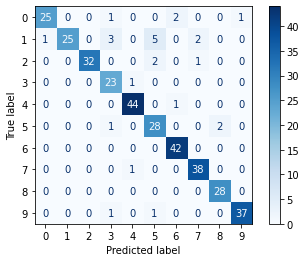

|   accuracy |   precision |   recall |   fscore |
|------------+-------------+----------+----------|
|   0.925287 |    0.925612 | 0.923321 | 0.919684 |


In [13]:
support_vector_classifier()

### *LogisticRegression*

In [0]:
def logistic_regression():
  def metrics_analyzer(clf):
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    accuracy = clf.score(X_test, y_test)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')
    print(tabulate([[accuracy, precision, recall, fscore]], headers=['accuracy', 'precision', 'recall', 'fscore'], tablefmt='orgtbl'))
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  metrics_analyzer(clf)

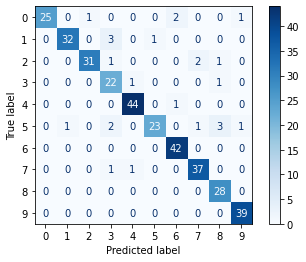

|   accuracy |   precision |   recall |   fscore |
|------------+-------------+----------+----------|
|   0.928161 |    0.926996 | 0.922177 | 0.920768 |


In [15]:
logistic_regression()

### *Deep Neural Network*

In [0]:
def DNN_classifier():
  def plot_graphs(history, arg):
    plt.plot(history.history[arg])
    plt.plot(history.history['val_'+arg])
    plt.xlabel("Epochs")
    plt.ylabel(arg)
    plt.legend([arg, 'val_'+arg])
    plt.show()
 
  model = Sequential()
  model.add(Dense(64, input_shape=(300,), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)
  loss, acc = model.evaluate(X_test, y_test)
  print(tabulate([[loss, acc]], headers=['loss', 'accuracy'], tablefmt='orgtbl'))
  plot_graphs(history, 'accuracy')
  plot_graphs(history, 'loss')

Epoch 1/100
40/40 [==============================] - 0s 7ms/step - loss: 2.2768 - accuracy: 0.1829 - val_loss: 2.2384 - val_accuracy: 0.2857
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 2.1477 - accuracy: 0.3570 - val_loss: 2.0393 - val_accuracy: 0.4429
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.8818 - accuracy: 0.4026 - val_loss: 1.7211 - val_accuracy: 0.5714
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.5938 - accuracy: 0.4984 - val_loss: 1.4188 - val_accuracy: 0.6929
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 1.3375 - accuracy: 0.5807 - val_loss: 1.1516 - val_accuracy: 0.7500
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1620 - accuracy: 0.6118 - val_loss: 0.9750 - val_accuracy: 0.7786
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0202 - accuracy: 0.6693 - val_loss: 0.8445 - val_accuracy: 0.8286
Epoch 8/100
4

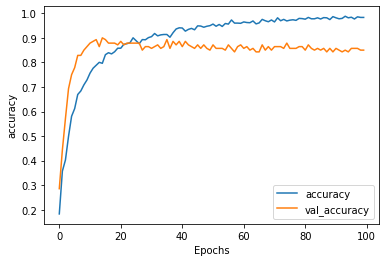

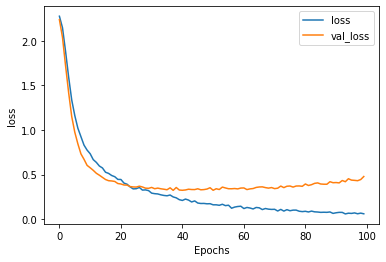

In [17]:
DNN_classifier()